#Probability

P(E) =  The probability of event E

* E and F are *dependent* if knowing something about whether E happens gives us information about whether F happens. Otherwise they are *independent*


* Mathematically, we say that two events E and F are independent if the probability that they both happen is the product of the probabilities that each one happens:

    * P(E, F) =  P(E) • P(F)

###Conditional Probability

* If two events E and F are independent, then by definition we have:

    * P(E,F) = P(E) • P(F)

* If they are not necessarily independent (and if the probability of F is not zero), then we define the probability of E "conditional on F" as:
    * P(E|F) = P(E, F)/P(F) 

* You should think of this as the probability that E happens, given that we know that F happens, we often rewrite as:
    * P(E, F) = P(E|F) • P(F)

* When E and F are independent, you can check that this gives:
    * P(E|F) = P(E)
    * Which is the mathematical way of expressing that knowing F occurred gives us no additinal information about whether E occurred

* Here is a common example
    * A family with two unkown children
        * Each child is equally likely to be a boy or girl
        * The gender of the second child is independent of the gender of the first child

* Now we can begin to ask what is the probability of an event
    * Both children are girls (B) 1/4
    * The older child is a girl (G) 1/2
    * Using the definition of conditional probability:
        * P(B|G) = P(B,G)/P(G) = P(B)/P(G) = 1/4 / 1/2 = 1/2
        * P(B,G) is just P(B) intuitively

* Lets do another
    * Both children are girls (B) 1/4
    * At least one of the children is a girl (L) 3/4 -- P(at least one) = 1 - P(not at all)
        * P(B|L) = P(B,L)/P(L) = P(B)/P(L) =  1/4 / 3/4 = 1/3

* This result almost seems odd, but we can check it by "generating" a lot of families

In [3]:
import random

In [4]:
def random_kid():
    return random.choice(['boy', 'girl'])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == 'girl':
        older_girl += 1
    if older == 'girl' and younger == 'girl':
        both_girls += 1
    if older == 'girl' or younger == 'girl':
        either_girl += 1

print("P(both | older): ", both_girls / older_girl)
print("P(both | either): ", both_girls / either_girl)

P(both | older):  0.5007089325501317
P(both | either):  0.3311897106109325


* P(both | older):  0.5007089325501317 = 1/2
* P(both | either):  0.3311897106109325 = 1/3

* This proves the theory

###Bayes's Theorem

Beyes is a way of "reversing" conditional probabilities

* Let's say we need to know the probability of some event E, conditional on some other event F occurring. But we only have information about the probability of F conditional on E occuring.

* Using the definition of conditional probability twice tells us:
    * P(E|F) = P(E,F) / P(F) = (P(F|E) • P(E)) / P(F)

* The event F can be split into the two mutually exclusive events "F and E" and "F and not E". If we write ¬E as "Not E" then:
    * P(F) = P(F,E) + P(F, ¬E)
    * So that:
        * P(E|F) = [P(F|E) • P(E)] / [(P(F|E) • P(E)) + P(F | ¬E) • P(¬E)] 

* Will be going through "Think Bayes" book for more in depth look here

###Random Variables

A **random variable** is a variable whose possible values have an associated probability distribution

* A simple example is a coin flip
    * The random variable equals one if a coin flip turns up heads and 0 if athe flip turns up tails

* A more complex one could measure the number of heads observed when flipping a coin 10 times, where each number is equally likely

* The associated distribution gives the probabilities that the variable realizes each of its possible values. A random variable of range(10) where each number is euqally likely, has a distribution that assigns probability 0.1 to each of the numbers from 0 to 9

The **expected value** is the average of a random variable's values wieghted by their probabilities

* The coin flip variable has an expected value of 1/2 (= 0 • 1/2 + 1 • 1/2)

* The range(10) variable has an expected value of 4.5 (= 0 • .1 + 1 • .1 ...etc)

Random variables can be *conditioned* on events just like other events.

* Going back to the two child example
    * if X is a random variable representing the number of girls, X equals 0 with a probability of 1/4, 1 with a probability of 1/2 and 2 with a probabiltiy of 1/4

* It is a way of mapping random processes to events

###Continuous Distributions

A coin flip represents a *discrete* distribution, but what if we need a continuous one?

* The **uniform distribution** puts equal weight on all the numbers between 0 and 1
    * Because there are infinitely many numbers between 0 and 1, the weight it assigns to individual points must be zero
    * For this reason we represent a continuous distribution with a probability density function(pdf)
        * A pdf is the probability of seeing a value in a certain interval equals the integral of the density function over that interval

* The density function of the uniform distribution is just:

In [5]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

* The probability that a random variable is between .3 and .4 is 1/10 --makes sense

* More often used is the **cumulative distribution function**, which give the probability that a random variable is less than or equal to a certain value.

* It's really easy to create the cummulative distribution function from the uniform distribution

In [8]:
def uniform_cdf(x):
    "returns the probability that a uniform random variable is less than x"
    if x < 0: return 0 #uniform random is always between 0 and 1
    if x < 1: return x # e.g. p(X <= .4) = .4
    else: return 1

In [9]:
uniform_cdf(.4)

0.4

###The Normal Distribution

The king of distributions

* Its curve is determined by two factors, its mean µ (mu) and its standard deviation &sigma; (sigma)
    * The mean determines where the bell is centered and the standard deviation how wide it is
    * Here is it's distribution function:

$$  f(x \; | \; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} } $$

* Which in python is:

In [18]:
import math

In [34]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu)**2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

In [36]:
normal_pdf(5)

1.4867195147342979e-06

In [37]:
normal_pdf(4)

0.00013383022576488537

* ^^ This is giving us the y coordinate for the x provided

* Now lets plot this:

In [23]:
from matplotlib import pyplot as plt

In [24]:
%matplotlib inline

In [25]:
xs = [x/10 for x in range(-50,50)]

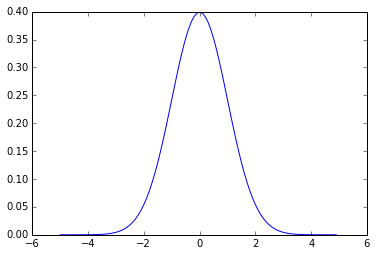

In [26]:
plt.plot(xs,[normal_pdf(x, sigma = 1) for x in xs], '-', label='mu=0,sigma=1')

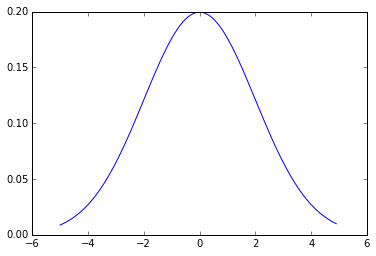

In [27]:
plt.plot(xs, [normal_pdf(x,sigma=2) for x in xs],'-',label='mu=0,sigma=2')

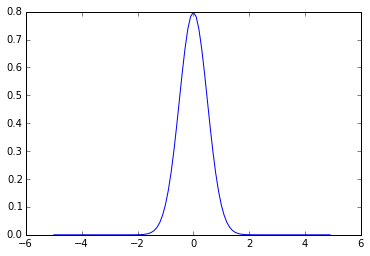

In [28]:
plt.plot(xs, [normal_pdf(x,sigma=.5) for x in xs],'-',label='mu=0,sigma=.5')

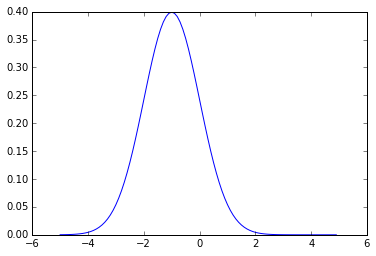

In [33]:
plt.plot(xs, [normal_pdf(x,mu=-1) for x in xs],'-',label='mu=-1,sigma=0')

* Lets see them all together!

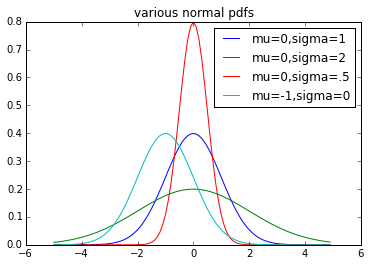

In [32]:
plt.plot(xs,[normal_pdf(x, sigma = 1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs, [normal_pdf(x,sigma=2) for x in xs],'-',label='mu=0,sigma=2')
plt.plot(xs, [normal_pdf(x,sigma=.5) for x in xs],'-',label='mu=0,sigma=.5')
plt.plot(xs, [normal_pdf(x,mu=-1) for x in xs],'-',label='mu=-1,sigma=0')
plt.legend()
plt.title('various normal pdfs')

When µ = 0 and &sigma; = 1 it is called the **standard normal distribution**

* If Z is a standard normal random variable then:

    X = &sigma; • Z + µ

    is also normal but with its mean µ and its standard deviation &sigma;
    
    the converse of this is also true in that:
    if X is a normal random variable with mean µ and standard deviation &sigma;:
    
    Z = (X - µ)/ &sigma;
    
    is a standard normal variable

* The cumulative distribution function for the normal distribution cannot be written in a simple manner but we must use math.erf which is the error function -- google if you want to know more

In [38]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) /  math.sqrt(2) / sigma)) / 2 

Plot it!

In [39]:
xs = [x/10 for x in range(-50,50)]

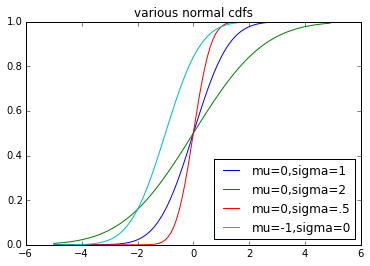

In [40]:
plt.plot(xs,[normal_cdf(x, sigma = 1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs, [normal_cdf(x,sigma=2) for x in xs],'-',label='mu=0,sigma=2')
plt.plot(xs, [normal_cdf(x,sigma=.5) for x in xs],'-',label='mu=0,sigma=.5')
plt.plot(xs, [normal_cdf(x,mu=-1) for x in xs],'-',label='mu=-1,sigma=0')
plt.legend(loc=4)
plt.title('various normal cdfs')

* So let's high level what were looking at:
    * This is the cummulative distribution function of the standard normal distribution
    * it gives the probability that a random variable is less than or equal to a given value

* There are times when you will need to invert normal_cdf in order to find the value that corresponds to a certain probability
    * Unfortunately, this is not easy to do
    * However, we know that normal_cdf is continuous and only increasing
        * This means we can use a binary search algorithm to estimate it.
            * A binary search algorithm is essentially a divide and conquer method 

In [41]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance = .0001):
    """find approximate inverse using binary search"""
    # if not standard, compute standard and rescale
    

SyntaxError: invalid syntax (<ipython-input-41-76dcf7190f9d>, line 1)